*This Notebook has been created by PALISSON Antoine.*<br>


In [1]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn 
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Tensorflow
import tensorflow as tf

### Datasets

In [2]:
data = fetch_openml('california_housing', version=1)
housing = pd.concat([data['target'], data['data']], axis=1).dropna()
housing.head()

,median_house_value,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,452600.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,358500.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,352100.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,341300.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,342200.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   median_house_value  20433 non-null  float64 
 1   longitude           20433 non-null  float64 
 2   latitude            20433 non-null  float64 
 3   housing_median_age  20433 non-null  float64 
 4   total_rooms         20433 non-null  float64 
 5   total_bedrooms      20433 non-null  float64 
 6   population          20433 non-null  float64 
 7   households          20433 non-null  float64 
 8   median_income       20433 non-null  float64 
 9   ocean_proximity     20433 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.6 MB


In [4]:
data = fetch_openml("wdbc", version=1)
breast = pd.concat([data['target'], data['data']], axis=1).dropna()
breast.head()

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,2,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,2,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,2,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Regression

## Preprocessing

**<font color='blue'>1. Create a validation set and a test set by using respectively 10% and 20% of the data.**

*Tips: You can use the `train_test_split` function from sklearn.*

In [5]:
X = housing.iloc[:, 1:]
y = housing.iloc[:, 0]

#Split training set and the rest.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

#Split testing set and validation set.
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=1/3, random_state=42)

In this exercise, the label is the **median_house_value**.

**<font color='blue'>2. Separate the features and the label (for the train, validation and testing sets).**

*Tips: You can use the `pop` function from pandas.*

Deep learning algorithms **often require standardized data more than other algorithms** due to their reliance on complex neural network architectures. Here are some reasons:

*   It ensures that the neural network is trained on consistent and comparable data. Each layer should receive input data in a consistent format in order to improve the overall performance.
*   If the input features are not standardized, the differences in scale between features can result in the neural network assigning higher weights to some features and lower weights to others, which can result in poor performance.
*   It helps to reduce the number of iterations required to optimize the neural network's weights, and can also help to prevent the optimizer from getting stuck in local minima.

**<font color='blue'>3.a. Standardize the features.**

*Tips: You can use the `StandardScaler` function from sklearn.*

In [6]:
#Cat -> ohe; Num -> standardscaler

In [8]:
num_col = X.select_dtypes(exclude='category').columns
ct = ColumnTransformer([
    ('num', StandardScaler(), num_col),
    ('cat', OneHotEncoder(), ['ocean_proximity'])
])


X_train_f = ct.fit_transform(X_train)
X_val_f = ct.transform(X_val)
X_test_f = ct.transform(X_test)

col_names = np.concatenate([num_col, ct.named_transformers_.cat.get_feature_names_out()], axis=0)

X_train_f = pd.DataFrame(X_train_f, columns=col_names)
X_val_f = pd.DataFrame(X_val_f, columns=col_names)
X_test_f = pd.DataFrame(X_test_f, columns=col_names)



In deep learning regression, **standardizing the labels can be just as important as standardizing the input features** for the following reasons:


*   **Gradient calculations**: The gradients used for optimizing the weights in a deep neural network are calculated based on the loss between the predicted and true labels. If the labels are not standardized, then the gradients will be calculated on a different scale. This can result in unstable gradient updates and slower convergence during training. 
*   **Activation functions**: The activation functions used in deep neural networks are designed to work best on inputs that are on a similar scale. If the labels are not standardized, then the activations can be biased towards some labels, which can result in lower accuracy. 
*   **Bias term**: A bias term is often included in the output layer of a deep neural network. If the labels are not standardized, then the bias term can become dominated by the largest values, leading to an imbalanced weighting of the inputs.

**<font color='blue'>3.b. Standardize the labels.**

*Tips: You can use the `StandardScaler` function from sklearn. Don't use the same as the one for the features.*

In [9]:
std_scaler_lab = StandardScaler()
y_train_std = std_scaler_lab.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_val_std = std_scaler_lab.transform(y_val.to_numpy().reshape(-1, 1))
y_test_std = std_scaler_lab.transform(y_test.to_numpy().reshape(-1, 1))

## Architecture

**TensorFlow Keras** is a high-level API for building and training deep learning models in TensorFlow. TensorFlow Keras **provides a variety of pre-defined layers that can be used to build a neural network**, as well as the ability to create custom layers.

The **Dense layer** in TensorFlow is a fully connected layer where each neuron is connected to every neuron in the previous layer. In other words, all input features are connected to all output features.

It takes in a tensor as input and applies a linear transformation to produce an output tensor. This linear transformation is defined by a set of weights and biases that are learned during the training process.

The Dense layer has many parameters.<br> In this exercise, we will only consider 3 of them:

*   **units**: It specifies the number of neurons in the layer. It determines the dimensionality of the output space, i.e., the number of features in the output tensor. For example, if you set units to 10, the Dense layer will output a tensor with 10 features.

*   **activation**: It specifies the activation function applied to the output of the layer. Activation functions introduce non-linearity to the model and are an essential component of deep neural networks. You can set this parameter to any activation function provided by TensorFlow, or you can create your own custom activation function. 

*   **use_bias**: It specifies whether to include a bias term in the layer or not. The bias term is an additional parameter that is added to the output of each neuron. It allows the model to learn an offset from zero, which can be useful for certain types of problems. By default, the use_bias parameter is set to True, but you can set it to False to exclude the bias term from the layer.

You can create a Dense layer in TensorFlow using the tf.keras.layers.Dense class:


```
import tensorflow as tf
dense = tf.keras.layers.Dense()
```

`tf.keras.layers.Dense` [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

**<font color='blue'>1. Create a Dense layer that contains 8 neurons with a ReLU activation function and a bias using the Tensorflow Keras library.**

In [10]:
dense = tf.keras.layers.Dense(
    units=8,
    activation='relu',
    use_bias=True
)
dense

Performing a forward pass on a TensorFlow Dense layer is straightforward. Given an input tensor, you can apply the Dense layer using the `call` method of the `tf.keras.layers.Dense` class. 

In python, when you write `dense(x)`, it is interpreted as a call to the `__call__()` method of the Layer class with x as an argument.

```
output = dense(x_train)
```

**<font color='blue'>2. Do the forward pass on this layer on the training features.**

*Tips: The output of a Dense layer is always of shape (instances, number of neurons)* 

In [12]:
X_train_f

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-0.686846,0.920798,-0.445203,0.399304,0.834551,0.910535,0.835419,-1.015918,0.0,1.0,0.0,0.0,0.0
1,0.681149,-0.778899,0.428308,-0.186537,0.515742,1.358170,0.625219,-1.160854,1.0,0.0,0.0,0.0,0.0
2,-1.176128,0.766280,-0.127563,0.105463,-0.171840,-0.243890,-0.178795,0.632436,1.0,0.0,0.0,0.0,0.0
3,-1.161150,0.794374,0.507719,-0.203118,0.168382,-0.201134,0.168035,-0.564246,1.0,0.0,0.0,0.0,0.0
4,0.651193,-0.792946,0.984179,-0.826725,-0.780909,-0.625208,-0.804139,-1.296492,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14298,0.805966,-0.900641,-0.365793,0.166257,-0.086190,0.011776,-0.118362,0.814407,1.0,0.0,0.0,0.0,0.0
14299,1.020651,-0.881911,-1.874586,1.481177,1.186669,1.600747,1.321506,0.482352,1.0,0.0,0.0,0.0,0.0
14300,0.581295,-0.764852,1.063590,-0.477155,-0.397862,-0.411426,-0.357465,-0.409382,1.0,0.0,0.0,0.0,0.0
14301,-1.226055,0.902069,-1.318715,1.422685,1.255665,1.756067,1.468646,0.740495,0.0,0.0,0.0,1.0,0.0


In [14]:
output = dense(X_train_f.to_numpy())
pd.DataFrame(output)

,0,1,2,3,4,5,6,7
0,0.473284,0.153665,0.207528,0.000000,0.000000,0.000000,0.000000,0.038546
1,0.595494,0.000000,0.000000,0.376447,0.000000,0.000000,0.000000,0.000000
2,0.313460,0.367005,0.000000,0.060038,0.215560,0.000000,0.000000,0.000000
3,0.871335,0.603557,0.241983,0.250010,0.000000,0.000000,0.000000,0.000000
4,1.160851,0.665425,0.111505,0.488181,0.000000,0.000000,0.306279,0.598154
...,...,...,...,...,...,...,...,...
14298,0.000000,0.000000,0.000000,0.104566,0.000000,0.346647,0.489419,0.000000
14299,0.000000,0.000000,0.000000,0.000000,0.000000,0.201133,0.000000,0.000000
14300,0.807860,0.295246,0.169820,0.464529,0.000000,0.000000,0.497747,0.000000
14301,0.000000,0.000000,0.000000,0.000000,0.847333,0.000000,0.000000,0.000000


It is possible to **stack multiple layers** by passing the output of the previous layer to the next.

**<font color='blue'>3. Create a second dense layer, with one neuron, a linear activation function and a bias.<br> This type of configuration is  typical of an output layer for a regression task.** 

In [15]:
dense2 = tf.keras.layers.Dense(units=1, activation='linear', use_bias=True)
output = dense2(output)
output

<tf.Tensor: shape=(14303, 1), dtype=float32, numpy=
array([[0.32891828],
       [0.3629131 ],
       [0.14735949],
       ...,
       [0.71577084],
       [0.16548806],
       [0.08415061]], dtype=float32)>

In TensorFlow Keras, **a model is a way of organizing layers into a complete graph of computations that transform input data into output predictions**. The `tf.keras.Model` class provides a high-level API for defining and training deep learning models in TensorFlow.

***A `tf.keras.Model` is constructed by defining the input and output layers, and any hidden layers that are necessary.*** The input and output layers define the shape of the input data and the shape of the predicted output data, respectively. The hidden layers can be added as necessary to transform the data in the desired way.

**The input layer can be defined using the `tf.keras.Input` class.**<br> The only mandatory parameter is the shape of the inputs (the number of features).<br> For a dataset with 15 features, the input layer of the model can be written as:

```
input_layer = tf.keras.Input(shape=(15,))
```

`tf.keras.Model` [*Documentation*](https://www.tensorflow.org/api_docs/python/tf/keras/Model)<br>
`tf.keras.Input` [*Documentation*](https://www.tensorflow.org/api_docs/python/tf/keras/Input)

**<font color='blue'>4.a. Create an input layer with the correct shape (housing dataset).**

In [16]:
input_layer = tf.keras.Input(shape=(13,))

In TensorFlow, you can chain layers together using a **functional model**. In a functional model, you define the input layer(s) and output layer(s), and then create a "graph" of layers that connect the input to the output. **Each layer in the graph takes the output of the previous layer as its input**, and produces an output that can be used as the input to the next layer.


```
output_1 = tf.keras.layers.Dense(...)(input)
output_2 = tf.keras.layers.Dense(...)(output_1)
output_3 = tf.keras.layers.Dense(...)(output_2)
...
```


**<font color='blue'>4.b. Create one hidden layer with the tf.keras.Dense class with 8 neurons, a ReLU activation function and a bias.<br> This layer should take the output of the input_layer as input.**

In [17]:
output_1 = tf.keras.layers.Dense(units=8, activation='relu', use_bias=True)(input_layer)

**<font color='blue'>4.c. Finally, create one output layer with the tf.keras.Dense class with 1 neurons, a linear activation function and a bias.<br> This layer should take the output of the hidden layer as input..**

In [18]:
output = tf.keras.layers.Dense(units=1, activation='linear', use_bias=True)(output_1)

**The `tf.keras.Model` class accepts three parameters: inputs, outputs and name.** <br>To create a Tensorflow Keras model, you need to specify the input layers in the inputs parameter and the output layers in the outputs parameter.

```
model = tf.keras.Model(inputs=..., outputs=...)
```


**<font color='blue'>5. Create the model using the tf.keras.Model class and the layers created at question 4.**

In [19]:
model1 = tf.keras.Model(inputs=input_layer, outputs=output, name='model1')

You can check the model architecture using:


*   the `summary()` method which is a convenient way to get a high-level architecture of the structure of the deep neural network model. 
*   the `plot_model()` function from `tf.keras.utils` that can be used to visualize the structure of a Keras model. It generates a diagram of the model architecture, which can be saved to a file or displayed on the screen. This function is particularly useful for visualizing complex models with multiple inputs or outputs, or models with branching or merging layers.

```
model.summary()
tf.keras.utils.plot_model(model)
```

`summary()` [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary)<br>
`tf.keras.utils.plot_model()` [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model)



**<font color='blue'>6.a. Use the `summary()` method on your model.<br>Pay attention to the different elements of the output.**

In [20]:
model1.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_2 (Dense)             (None, 8)                 112       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


**<font color='blue'>6.b. Use the `plot_model()` function on your model.**

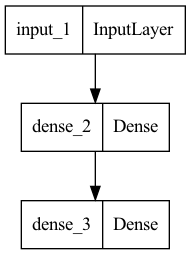

In [21]:
tf.keras.utils.plot_model(model1)

## Training

Before starting the training, we need to specify the loss function, Gradient Descent the algorithm we want to use and the metrics.

The `compile()` method is a function in TensorFlow that is used to configure the learning process of a model by specifying the loss, the metrics and the optimizer. It is typically called after a model has been defined, but before it has been trained on any data.

The `compile()` method allows you to specify the following important parameters:

*   **optimizer**: The optimizer is the algorithm that is used to update the weights of the neural network during training. Some common optimizers include stochastic gradient descent (SGD), Adam, and Adagrad. Tensorflow keras already has builtin losses that you can find in the `tf.keras.optimizers` class.

*   **loss**: The loss function is a metric that is used to measure the difference between the predicted output of the model and the true output. The loss function is used by the optimizer to adjust the weights of the neural network to minimize the difference between the predicted and true output. Some common loss functions include mean squared error, categorical cross-entropy, and binary cross-entropy. Tensorflow keras already has builtin losses that you can find in the `tf.keras.losses` class.

*   **metrics**: Metrics are used to measure the performance of the model during training and testing. Some common metrics include accuracy, precision, recall, and F1 score. Tensorflow keras already has builtin losses that you can find in the `tf.keras.metrics` class.

```
model.compile(loss=...,
              optimizer=...,
              metrics=[...])
```

In this exercise, we will use the **MSE loss** ([Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError)) and the **SGD optimizer** ([Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/SGD)) with a **learning rate of 0.01**.<br> You can add the `learning_rate` parameter directly inside the SGD optimizer.

`compile()` [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)


**<font color='blue'>1. Provide the model with its loss and its optimizer using the `compile()` method.**

In [22]:
model1.compile(loss=tf.keras.losses.MeanSquaredError(),
             optimizer=tf.keras.optimizers.experimental.SGD(learning_rate=0.01))

Now, you are ready to train the model.

The `fit()` method is a function in TensorFlow that is used to train a neural network model on a given dataset. It is typically called after the model has been defined and compiled, and it is used to optimize the weights of the model so that it can make accurate predictions on new data.

The `fit()` method allows you to specify the following important parameters:

* **x**: The input data to train the model on. This can be a Numpy array or a TensorFlow Dataset.

* **y**: The target labels for the input data. This can also be a Numpy array or a TensorFlow Dataset.

* **batch_size**: The number of samples that are used in each iteration of training. This can be an integer or None.

* **epochs**: The number of times to iterate over the entire dataset. This can be an integer or None.

* **validation_data**: The validation data to use during training. This can be a tuple of x_val and y_val, or a TensorFlow Dataset.

* **callbacks**: A list of callback functions to use during training. This can include functions to save the weights of the model, or to stop training early if the performance of the model stops improving.

The `fit()` method returns a **History object** that contains information about the training history of the model, such as the loss and accuracy metrics on the training and validation data at each epoch. You can use this information to monitor the performance of the model during training and make decisions about when to stop training or adjust the model parameters.

```
history = model.fit(x=...,
                    y=...,
                    batch_size=...,
                    epochs=...,
                    validation_data=(x_val, y_val),
                    callbacks=[...])
```


`fit()` [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)

**<font color='blue'>2. Train the model with batch_size=32 and epochs=25.<br> Store the result of the `fit()` method in a variable.**

*Tips: Don't forget to fill the `validation_data` parameter with the validation set.*

In [23]:
history = model1.fit(x=X_train_f,
                    y=y_train_std,
                    batch_size=32,
                    epochs=25,
                    validation_data=(X_val_f, y_val_std),
                    callbacks=None)

Epoch 1/25
447/447 [==============================] - 1s 1ms/step - loss: 0.5241 - val_loss: 0.3719
Epoch 2/25
447/447 [==============================] - 0s 756us/step - loss: 0.3811 - val_loss: 0.3456
Epoch 3/25
447/447 [==============================] - 0s 747us/step - loss: 0.3593 - val_loss: 0.3279
Epoch 4/25
447/447 [==============================] - 0s 743us/step - loss: 0.3465 - val_loss: 0.3202
Epoch 5/25
447/447 [==============================] - 0s 757us/step - loss: 0.3364 - val_loss: 0.3123
Epoch 6/25
447/447 [==============================] - 0s 763us/step - loss: 0.3273 - val_loss: 0.3106
Epoch 7/25
447/447 [==============================] - 0s 756us/step - loss: 0.3193 - val_loss: 0.3009
Epoch 8/25
447/447 [==============================] - 0s 764us/step - loss: 0.3125 - val_loss: 0.2955
Epoch 9/25
447/447 [==============================] - 0s 764us/step - loss: 0.3072 - val_loss: 0.2896
Epoch 10/25
447/447 [==============================] - 0s 764us/step - loss: 0.3029 

It is important to look at the **learning curves** (*the training and the validation loss curves*) after the training step.

The `fit()` method in TensorFlow **returns a dictionary that contains the training and validation metrics (including the loss) for the model**. The keys of the dictionary correspond to the names of the metrics that were monitored during training, and the values are lists that contain the metric values at each epoch. When no metrics is provided to the model, the dictionary contains at least the loss of the model:

* **loss**: The training loss for each epoch.

* **val_loss**: The validation loss for each epoch.

```
history = model.fit(...)
metrics_dict = history.history
```



**<font color='blue'>3. Get the training and the validation losses and display them on a line graph using Matplotlib.**

In [24]:
model1.compile(loss=tf.keras.losses.MeanSquaredError(),
             optimizer=tf.keras.optimizers.experimental.SGD(learning_rate=0.01))

metrics_dict = history.history

In [25]:
epoch = range(25)

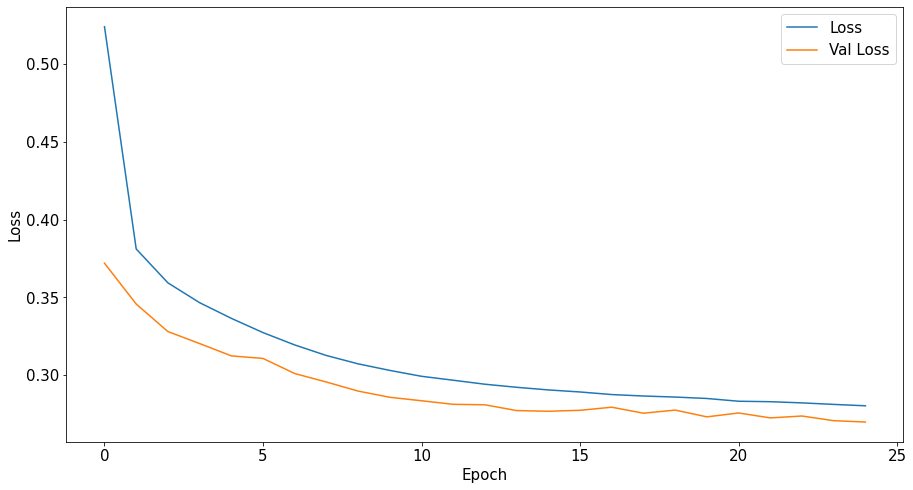

In [26]:
figs, ax = plt.subplots(figsize=(15,8))


ax.plot(epoch, metrics_dict['loss'], label='Loss')
ax.plot(epoch, metrics_dict['val_loss'], label='Val Loss')
ax.set_xlabel('Epoch', fontsize=15)
ax.set_ylabel('Loss', fontsize=15)
ax.tick_params(labelsize=15)
plt.legend(fontsize=15)
plt.show()


## Prediction

**The `evaluate()` and `predict()` methods are functions in TensorFlow that are used to test a trained neural network model on new data**. These methods can be called after the model has been trained using the `fit()` method.

The `evaluate()` method is used to evaluate the performance of the model on a test dataset. It takes as input the test data and returns the loss and metrics for the model. It allows you to evaluate the performance of the model on data that it has not seen during training.

```
# It takes both the features and the labels
model.evaluate(x=..., y=...)
```

`evaluate()` [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate)

**<font color='blue'>1.a. Use the `evaluate()` method to evalate the performances of the model on the test set.**

In [27]:
model1.evaluate(x=X_test_f,
               y=y_test_std)

128/128 [==============================] - 0s 636us/step - loss: 0.2834


0.28344297409057617

The `predict()` method is used to generate predictions from the trained model on new data. It takes as input the test data and returns the predicted output of the model. It allows you to use the trained model to make predictions on new data.

```
# It only takes the features
model.predict(x=...)
```

`predict()` [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict)

**<font color='blue'>1.b. Use the `predict()` method to evaluate the performances of the model on the test set.**

In [28]:
pred = model1.predict(x=X_test_f)

128/128 [==============================] - 0s 545us/step


The predictions are in the standardized format.

**<font color='blue'>2.a. Apply the inverse preprocessing transformation on the predictions.**

*Tips: The sklearn preprocessing functions provide an `inverse_transform` method.*

In [29]:
pred_f = std_scaler_lab.inverse_transform(pred)

**<font color='blue'>2.b. Compute the RMSE score.**

*Tips: You can get the RMSE function from the sklearn library.*

In [30]:
mean_squared_error(y_true=y_test, y_pred=pred_f, squared=False)

61448.2391314779

# Classification

The MLP architecture, the loss and the metrics are different for classification tasks.

**<font color='blue'>Build and train an MLP model for the breast dataset.**

*Tips: Don't forget to use the correct cross-entropy and the correct output layer activation function.*

## Preprocessing

In [33]:
X = breast.iloc[:, 1:]
y = breast.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=1/3, random_state=42, stratify=y_test)

In [36]:
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1    0.628141
2    0.371859
Name: Class, dtype: float64
1    0.631579
2    0.368421
Name: Class, dtype: float64
1    0.622807
2    0.377193
Name: Class, dtype: float64


In [37]:
# Pipeline and ColumnTransformer